In [1]:
source('~/canonades/RcisTarget/src/RCTpipe.r', echo = T, verbose = T)

'envir' chosen:<environment: R_GlobalEnv>
encoding = "native.enc" chosen
 --> from_file='TRUE'
 lines:function (x, ...)  
--> parsed 32 expressions; now eval(.)ing them:

>>>> eval(expression_nr. 1 )

> Sys.setenv(LOG_LEVEL = "TRACE")
curr.fun: symbol Sys.setenv
 .. after ‘expression(Sys.setenv(LOG_LEVEL = "TRACE"))’

>>>> eval(expression_nr. 2 )

> Sys.getenv("R_HOME")
curr.fun: symbol Sys.getenv
[1] "/users/genomics/xoel/canonades/RcisTarget/conda_env/lib/R"
 .. after ‘expression(Sys.getenv("R_HOME"))’

>>>> eval(expression_nr. 3 )

> PAR_METHOD <- "iCisTarget"
curr.fun: symbol <-
 .. after ‘expression(PAR_METHOD <- "iCisTarget")’

>>>> eval(expression_nr. 4 )

> PAR_SEARCH_RANGE <- "long"
curr.fun: symbol <-
 .. after ‘expression(PAR_SEARCH_RANGE <- "long")’

>>>> eval(expression_nr. 5 )

> PAR_MOTIF_NES <- 3
curr.fun: symbol <-
 .. after ‘expression(PAR_MOTIF_NES <- 3)’

>>>> eval(expression_nr. 6 )

> PAR_MOTIF_DB_V <- "V10"
curr.fun: symbol <-
 .. after ‘expression(PAR_MOTIF_DB_V

In [2]:
pdir <- '~/codebases/cortical_disorders2/results/RCT_diseases/plots/'
dir.create(pdir, showWarnings = F, recursive = F)
setwd(pdir)

In [3]:
load('../../../data/graphical.rda', verbose=T)

Loading objects:
  GeneAnnotation
  meta.colors
  facets


In [4]:
load('DiseaseCoreOrders.rda', verbose=T)

Loading objects:
  core.order
  core.levels
  dis.order
  dis.levels


In [5]:
library(dplyr)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union




In [6]:
figsize <- function(x,y){
    options(repr.plot.width=x, repr.plot.height=y)
}

## data

In [7]:
# perm.RCT <- readRDS('cisTarget_results.permuted.rds')
RCT <- readRDS('../cisTarget_results.rds')

In [8]:
RCT$summaryTbl[,-c(4,6)] %>% group_by(TF_highConf) %>% summarise_all(.funs = function(x) paste(unique(x),collapse = ','))

TF_highConf,geneSet,n.motifs,n.targets
<chr>,<chr>,<chr>,<chr>
ARNT2,ASD,1,202
CHD1,ASD,1,420
CNOT3,DD,1,33
CTCF,DD,1,36
DLX2,FCDandmTOR,1,7
EGR3,ASD,2,455
EP300,"ASD,DD,NEUROT_2018",1,"339,47,80"
FOXG1,Lissencephaly,1,5
FOXO3,SCZ_2020,1,48


# bicor

In [116]:
library(ggplot2)
library(ggpubr)
library(ggh4x)


#### data

In [117]:
bicor.df <- RCT$bicorRes$bicorRes
head(bicor.df)

,bicor,bicor.p,bicor.Z,bicor.t,bicor.nObs,Target,Core,geneSet
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>
ASD ARNT2.1,-0.1640300,0.4895443075,-0.7022644,0.7054756,20,ADK,ARNT2,ASD
ASD ARNT2.2,-0.1307731,0.5826301238,-0.5580188,0.5596290,20,ADNP,ARNT2,ASD
ASD ARNT2.3,-0.2098909,0.3744475031,-0.9039254,0.9107797,20,AHI1,ARNT2,ASD
ASD ARNT2.4,-0.3020739,0.1955196110,-1.3228562,1.3443952,20,AKAP9,ARNT2,ASD
ASD ARNT2.5,0.1780987,0.4525120289,0.7637533,0.7678851,20,ANKRD11,ARNT2,ASD
ASD ARNT2.6,0.6974254,0.0006305266,3.6583015,4.1287860,20,ANKS1B,ARNT2,ASD


In [118]:
bicor.df$CoreColor <- GeneAnnotation[bicor.df$Core, 'PeakSampleFct']
bicor.df$CoreFct <- factor(bicor.df$Core, levels = core.levels)
bicor.df$DisFct <- factor(bicor.df$geneSet, levels = dis.levels)

In [119]:
figsize(7,10)

#### plot

In [120]:
bicor.plot <- ggplot(bicor.df, aes(x=bicor)) + 
    geom_density(aes(fill=CoreColor), color=NA) + 
    facet_nested(rows=vars(DisFct, CoreFct), scales='free', space='fixed', switch='both', nest_line = T)  +
    scale_fill_manual('Peak sample', values=meta.colors$PeakSample) 

In [121]:
bicor.plot <- bicor.plot + 
    ylab('Regulon') +
    xlab('Bicorrelation') +
    ggtitle("Target's expression correlation") +
    theme_pubr(legend = 'right') +
    labs_pubr() +
    guides(fill=guide_legend(ncol=2,byrow=F, title.position = 'top')) +
    theme(
        text = element_text(family='ArialMT'),
        panel.grid.major.y = element_blank(), 
        panel.grid.minor.y = element_blank(),
        strip.background = element_blank(),
        strip.placement = 'outside',
        strip.text.y.left = element_text(angle = 0, hjust=1, vjust=1),
        panel.background = element_rect(fill='white'),
        panel.grid.major = element_line(),
        # axis.text.x = element_text(size=9, angle = 90, hjust=1, vjust=0.5),
        # axis.text.x.top = element_text(size=9, angle = 90, hjust=0, vjust=0.5),
        axis.title.y = element_text(angle = 90, hjust=1, vjust=1),
        axis.ticks.y = element_blank(),
        axis.text.y = element_blank()
    )  

In [122]:
figsize(12,8)

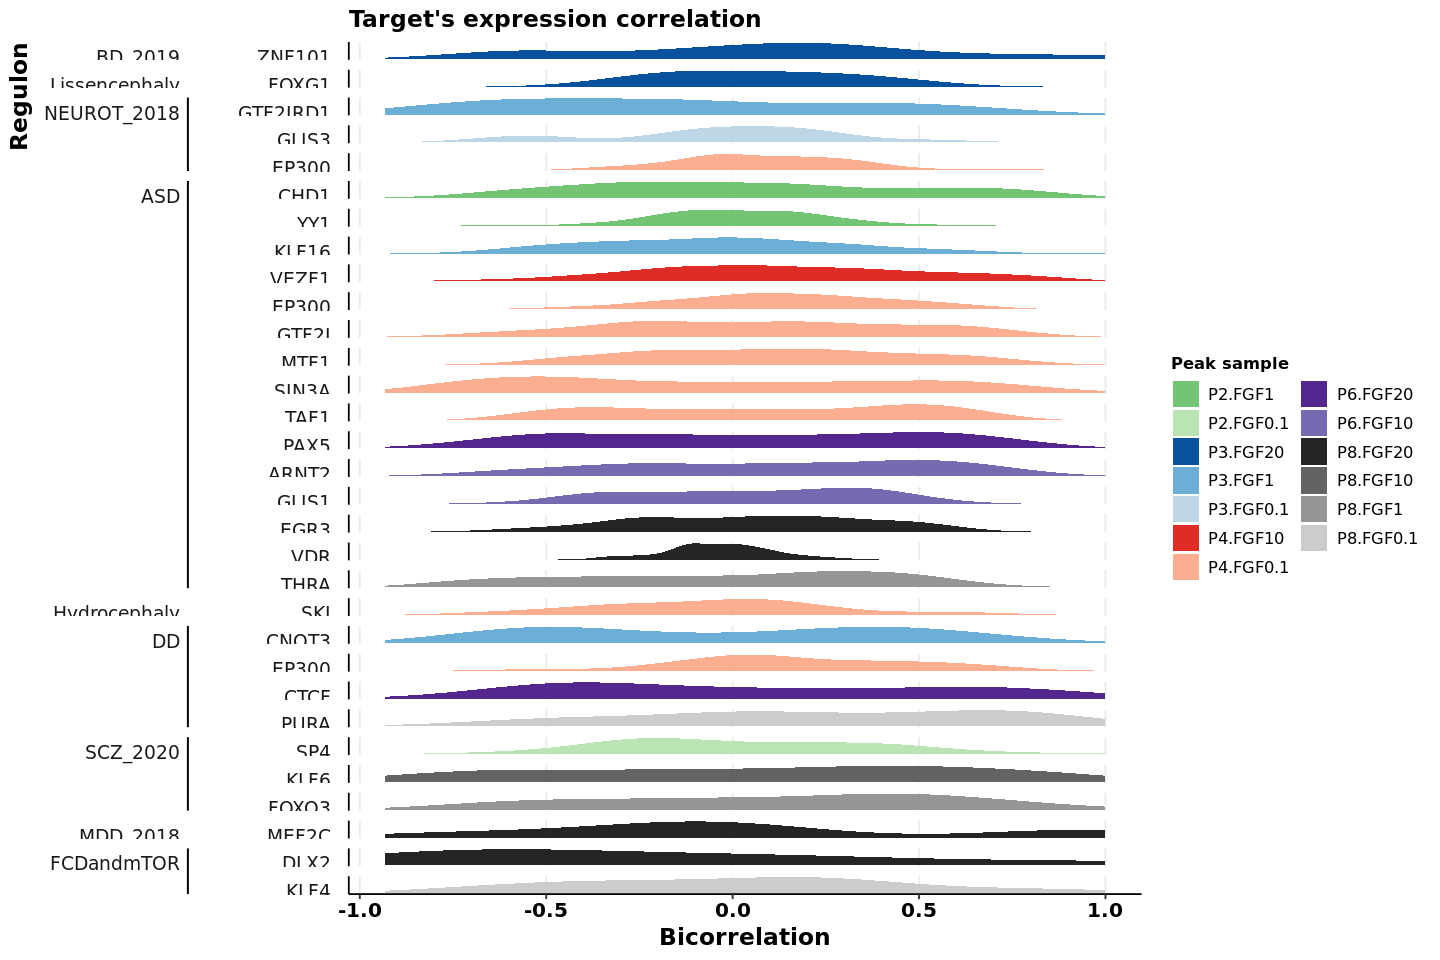

In [123]:
bicor.plot

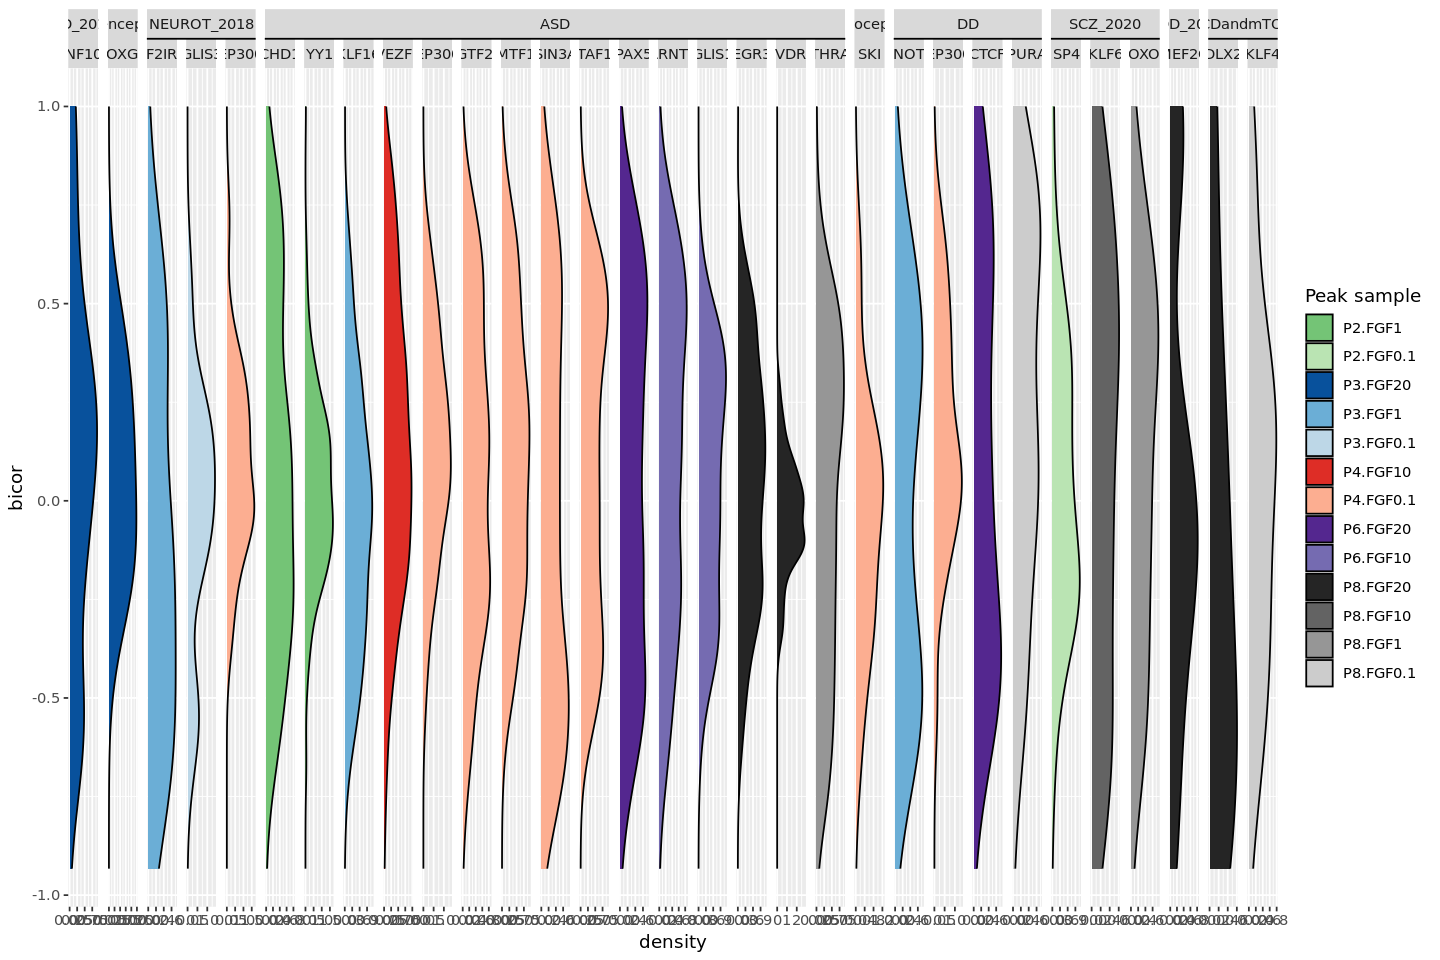

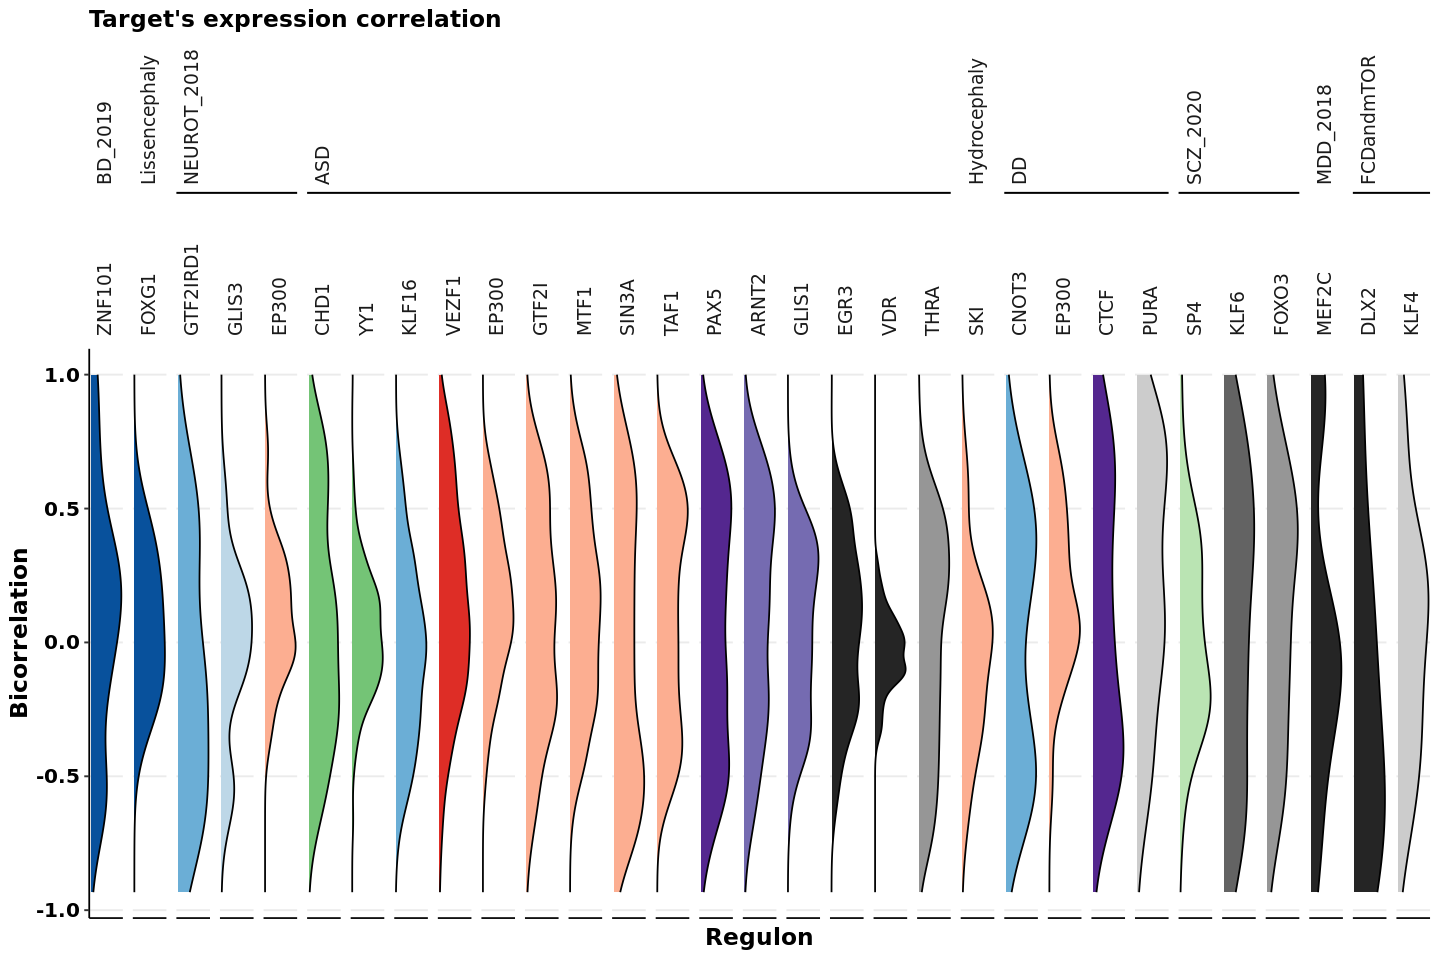

In [124]:
bicor.plot2 <- ggplot(bicor.df, aes(y=bicor)) + 
    geom_density(aes(fill=CoreColor), color='black') + 
    # geom_histogram(aes(fill=CoreColor), color=NA, bins = 10) + 
    # geom_violin(aes(fill=CoreColor, x=CoreFct)) + 
    facet_nested(cols=vars(DisFct, CoreFct), scales='free', space='fixed', nest_line = T) +# , switch='both')  +
    scale_fill_manual('Peak sample', values=meta.colors$PeakSample)
bicor.plot2

bicor.plot2 <- bicor.plot2 + 
    xlab('Regulon') +
    ylab('Bicorrelation') +
    ggtitle("Target's expression correlation") +
    theme_pubr(legend = 'none') +
    labs_pubr() +
    guides(fill=guide_legend(ncol=2,byrow=F, title.position = 'top')) +
    theme(
        text = element_text(family='ArialMT'),
        panel.grid.major.x = element_blank(), 
        panel.grid.minor.x = element_blank(),
        strip.background = element_blank(),
        strip.placement = 'outside',
        strip.text.x.top = element_text(angle = 90, hjust=0, vjust=1),
        panel.background = element_rect(fill='white'),
        panel.grid.major = element_line(),
        # axis.text.x = element_text(size=9, angle = 90, hjust=1, vjust=0.5),
        # axis.text.x.top = element_text(size=9, angle = 90, hjust=0, vjust=0.5),
        # axis.title.y = element_text(angle = 90, hjust=0, vjust=1),
        axis.ticks.x = element_blank(),
    
        axis.text.x = element_blank()
    )  

bicor.plot2

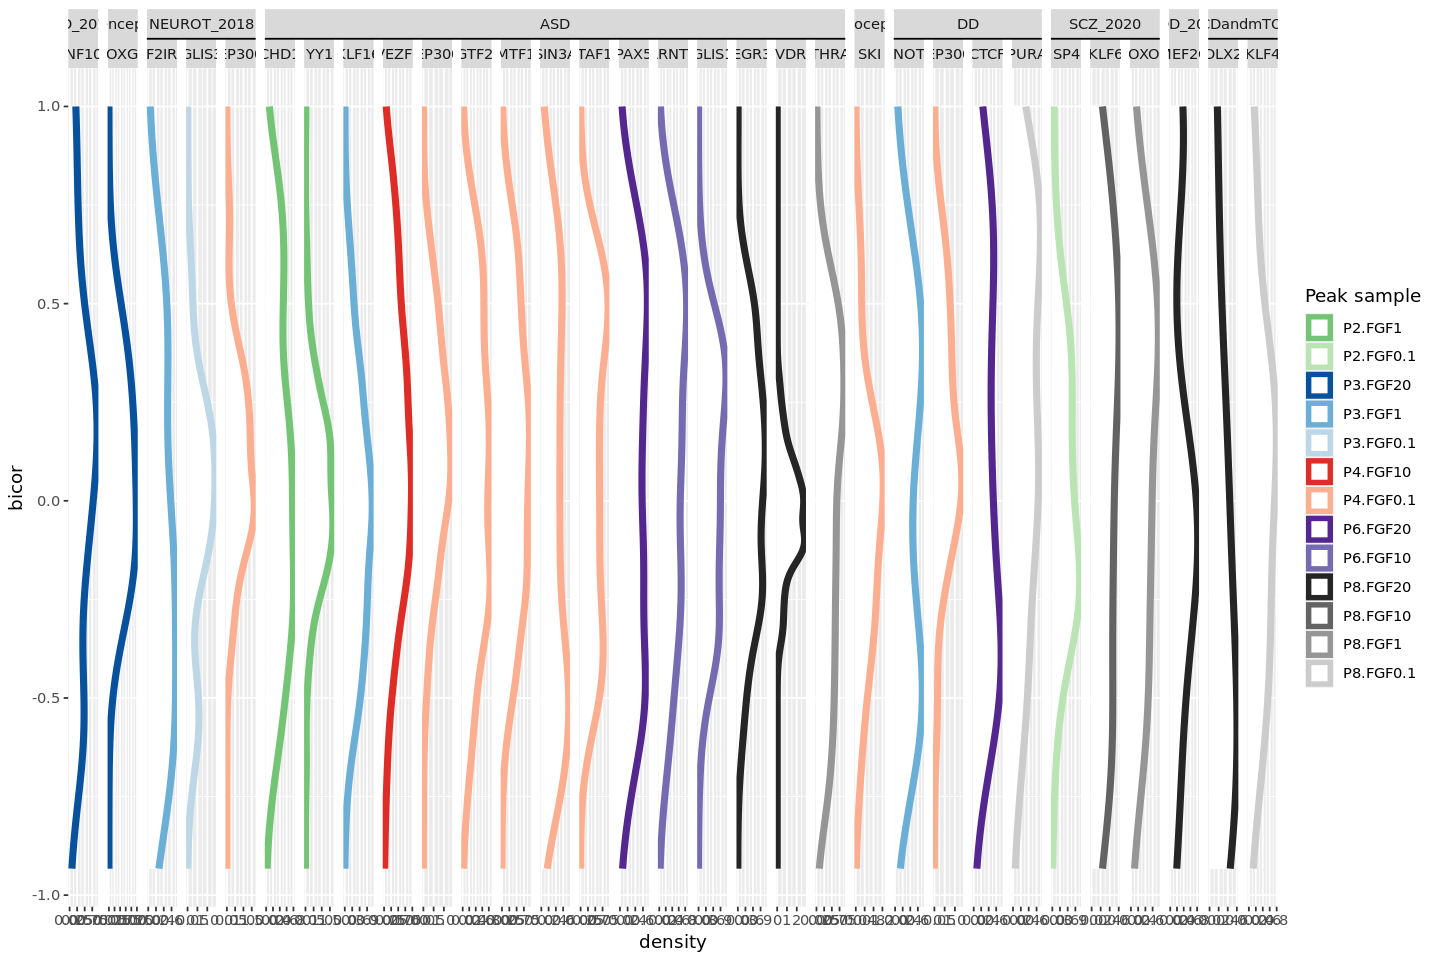

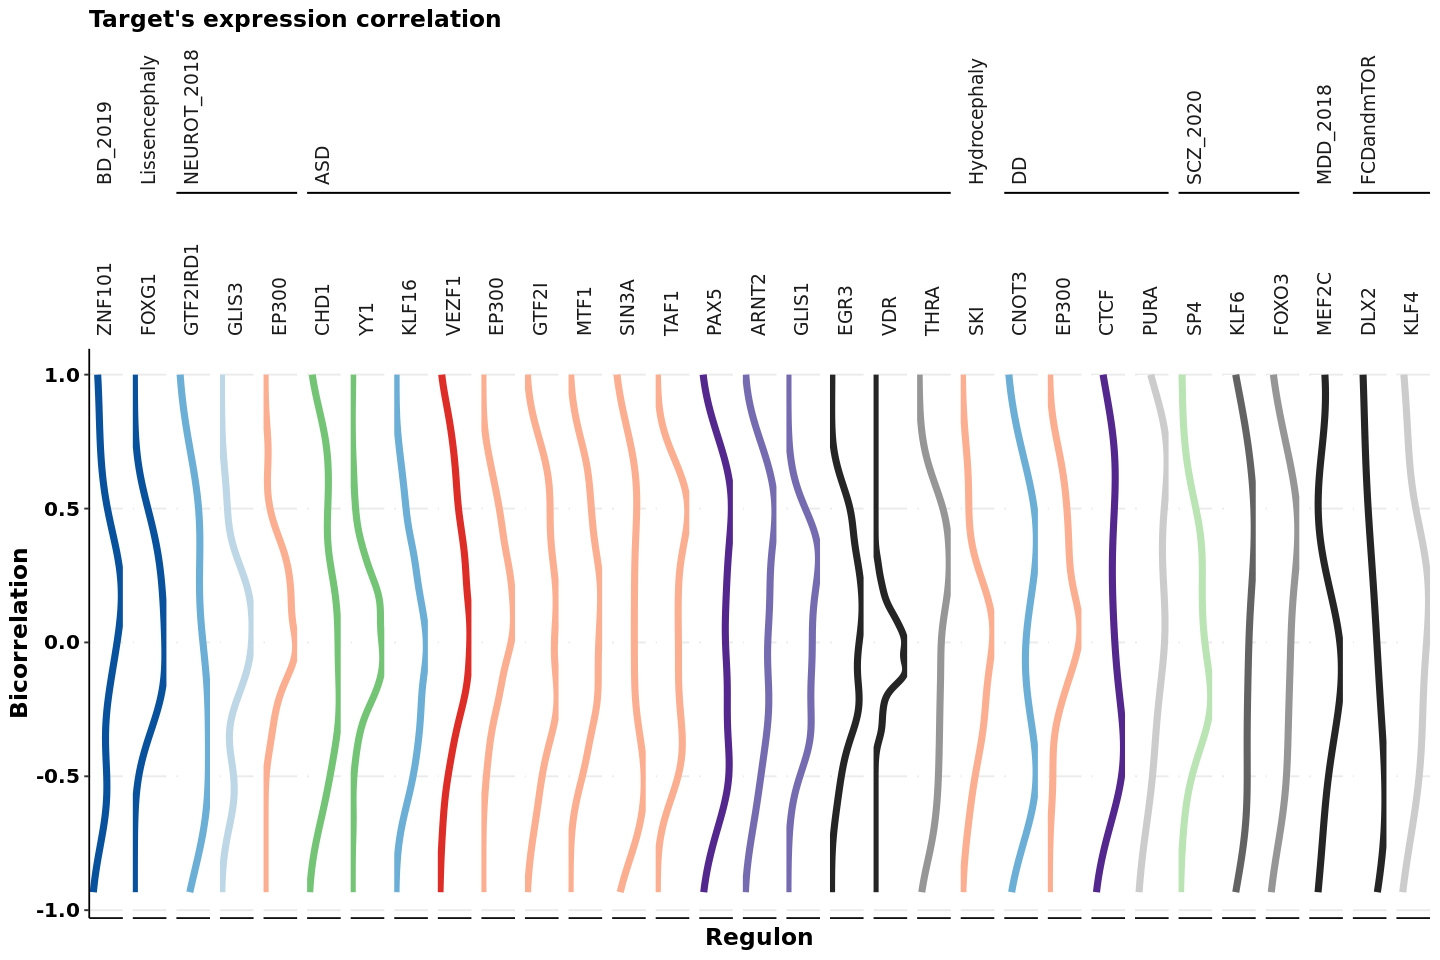

In [125]:
figsize(12,8)
bicor.plot3 <- ggplot(bicor.df, aes(y=bicor)) + 
    geom_density(aes(color=CoreColor), fill='white', linewidth=2) + 
    # geom_histogram(aes(fill=CoreColor), color=NA, bins = 10) + 
    # geom_violin(aes(fill=CoreColor, x=CoreFct)) + 
    facet_nested(cols=vars(DisFct, CoreFct), scales='free', space='fixed', nest_line = T) +# , switch='both')  +
    scale_color_manual('Peak sample', values=meta.colors$PeakSample)
bicor.plot3

bicor.plot3 <- bicor.plot3 + 
    xlab('Regulon') +
    ylab('Bicorrelation') +
    ggtitle("Target's expression correlation") +
    theme_pubr(legend = 'none') +
    labs_pubr() +
    guides(color=guide_legend(ncol=2,byrow=F, title.position = 'top')) +
    theme(
        text = element_text(family='ArialMT'),
        panel.grid.major.x = element_blank(), 
        panel.grid.minor.x = element_blank(),
        strip.background = element_blank(),
        strip.placement = 'outside',
        strip.text.x.top = element_text(angle = 90, hjust=0, vjust=1),
        panel.background = element_rect(fill='white'),
        panel.grid.major = element_line(),
        # axis.text.x = element_text(size=9, angle = 90, hjust=1, vjust=0.5),
        # axis.text.x.top = element_text(size=9, angle = 90, hjust=0, vjust=0.5),
        # axis.title.y = element_text(angle = 90, hjust=0, vjust=1),
        axis.ticks.x = element_blank(),
    
        axis.text.x = element_blank()
    )  

bicor.plot3

In [126]:
library(viridis)
figsize(10,6)


In [127]:
bicor.df.stat <- bicor.df %>% group_by(DisFct, CoreFct) %>% mutate(CoreMeanAbsBicor=mean(abs(bicor)),CoreMedianAbsBicor=median(abs(bicor)),CoreNSign=sum(bicor.p< 0.05),CoreFrSign=mean(bicor.p< 0.05))

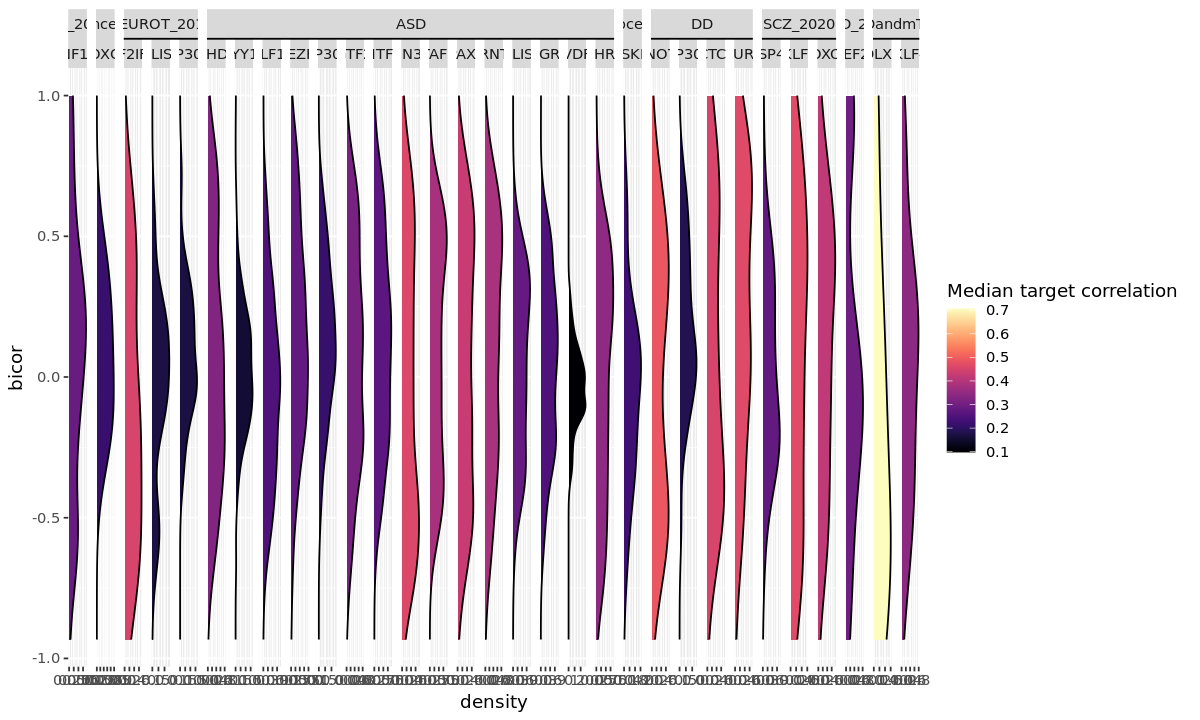

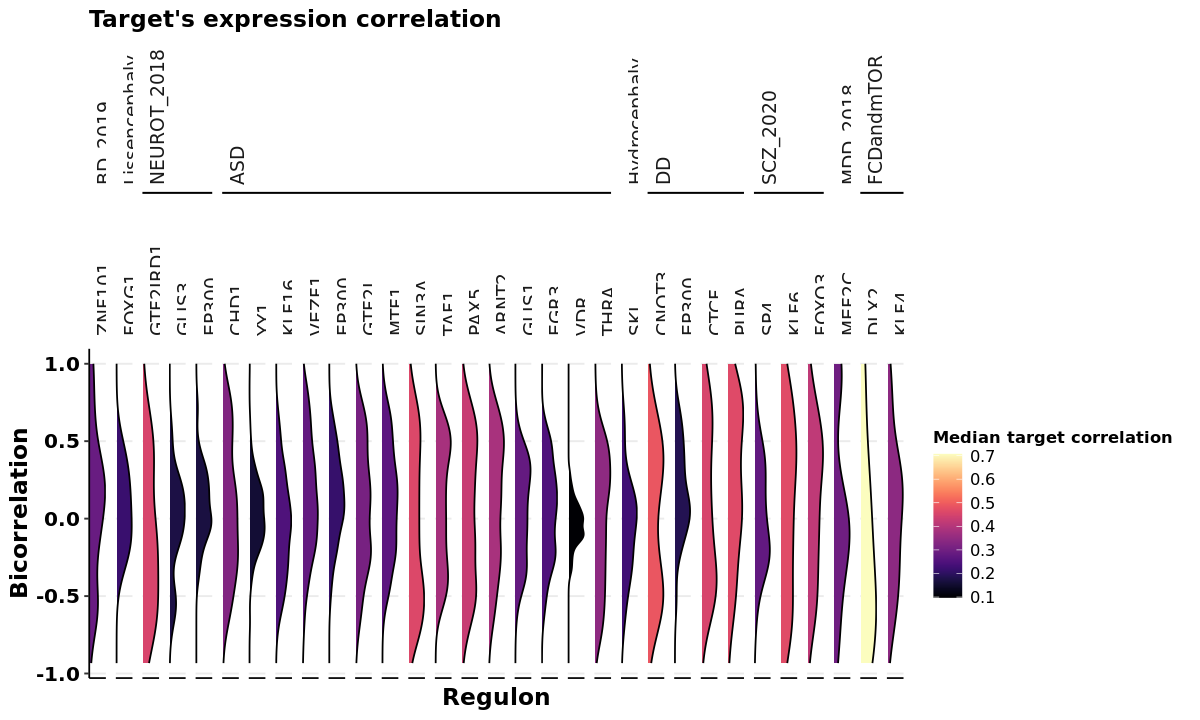

In [128]:
bicor.plot4 <- ggplot(bicor.df.stat, aes(y=bicor)) + 
    geom_density(aes(fill=CoreMedianAbsBicor), color='black') + 
    # geom_density(fill='black', color='black') + 
    # geom_histogram(aes(fill=CoreColor), color=NA, bins = 10) + 
    # geom_violin(aes(fill=CoreColor, x=CoreFct)) + 
    facet_nested(cols=vars(DisFct, CoreFct), scales='free', space='fixed', nest_line = T) + # , switch='both')  +
    scale_fill_viridis(name='Median target correlation ', option='magma')
bicor.plot4

bicor.plot4 <- bicor.plot4 + 
    xlab('Regulon') +
    ylab('Bicorrelation') +
    ggtitle("Target's expression correlation") +
    theme_pubr(legend = 'right') +
    labs_pubr() +
    guides(fill=guide_colorbar(title.position = 'top')) +
    theme(
        text = element_text(family='ArialMT'),
        panel.grid.major.x = element_blank(), 
        panel.grid.minor.x = element_blank(),
        strip.background = element_blank(),
        strip.placement = 'outside',
        strip.text.x.top = element_text(angle = 90, hjust=0, vjust=1),
        panel.background = element_rect(fill='white'),
        panel.grid.major = element_line(),
        # axis.text.x = element_text(size=9, angle = 90, hjust=1, vjust=0.5),
        # axis.text.x.top = element_text(size=9, angle = 90, hjust=0, vjust=0.5),
        # axis.title.y = element_text(angle = 90, hjust=0, vjust=1),
        axis.ticks.x = element_blank(),
    
        axis.text.x = element_blank()
    )  
bicor.plot4

### Add p-values of positive and negative correlation

#### data

In [129]:
poslbl.df <- RCT$bicorRes$bicorSummary[,c(1,2,grep('pos', colnames(RCT$bicorRes$bicorSummary)))]
neglbl.df <- RCT$bicorRes$bicorSummary[,c(1,2,grep('neg', colnames(RCT$bicorRes$bicorSummary)))]
poslbl.df$side <- 'pos'
neglbl.df$side <- 'neg'
colnames(poslbl.df) <- stringr::str_remove(pattern = '.pos', colnames(poslbl.df))
colnames(neglbl.df) <- colnames(poslbl.df)
lbl.df <- rbind(poslbl.df, neglbl.df)
lbl.df$bicor <- ifelse(lbl.df$side=='pos', 1, -1)
lbl.df$y <- Inf
head(lbl.df)

,Core,geneSet,mean,mean.pval,median,median.pval,n.sign,n.sign.pval,fr.sign,fr.sign.pval,side,bicor,y
,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>
ASD ARNT2,ARNT2,ASD,0.4070102,0.000,0.4276670,0.000,57,0.000,0.28217822,0.000,pos,1,Inf
ASD CHD1,CHD1,ASD,0.4105915,0.000,0.4076853,0.000,98,0.000,0.23333333,0.000,pos,1,Inf
ASD EGR3,EGR3,ASD,0.2799277,0.000,0.2609423,0.005,56,0.000,0.12307692,0.000,pos,1,Inf
ASD EP300,EP300,ASD,0.2840728,0.002,0.2606009,0.004,50,0.001,0.14749263,0.001,pos,1,Inf
ASD GLIS1,GLIS1,ASD,0.2843737,0.001,0.2907136,0.001,21,0.034,0.08713693,0.034,pos,1,Inf
ASD GTF2I,GTF2I,ASD,0.3621497,0.000,0.3273197,0.003,53,0.000,0.22083333,0.000,pos,1,Inf


In [130]:
lbl.df$sign.lbl <- ifelse(lbl.df$n.sign.pval==0, '<0.001', round(lbl.df$n.sign.pval, 3))

In [131]:
benf.alpha <- 0.05/nrow(unique(lbl.df[,c('geneSet', 'Core')]))

In [132]:
lbl.df$sign.star <- cut(lbl.df$n.sign.pval, breaks = c(0, benf.alpha, 0.05, 1), include.lowest = T, labels=c('**', '*', ''))
lbl.df$n.sign.lbl <- paste0(lbl.df$n.sign, lbl.df$sign.star)

In [133]:
lbl.df$CoreColor <- GeneAnnotation[lbl.df$Core, 'PeakSampleFct']
lbl.df$CoreFct <- factor(lbl.df$Core, levels = core.levels)
lbl.df$DisFct <- factor(lbl.df$geneSet, levels = dis.levels)

#### plot

In [134]:
figsize(8,10)

In [135]:
bicor.pval.plot <- bicor.plot + geom_text(
    data = lbl.df,
    aes(
        label=sign.lbl, 
        color=side, 
        y=y), hjust = 0.5, vjust = 1, size=3) + 
    scale_color_manual('Correlation', values=c('pos'='red', 'neg'='blue'), labels=c('Positive', 'Negative')) +
    scale_x_continuous(limits=c(-1.2,1.2))

In [136]:
bicor.pval.plot2 <- bicor.plot4 + geom_text(
    data = lbl.df,
    aes(
        label=sign.lbl, 
        color=side, 
        x=0.5
    ), hjust = 0.1, vjust = 1, size=3, angle=90) + 
    scale_color_manual('Correlation', values=c('pos'='red', 'neg'='blue'), labels=c('Positive', 'Negative')) +
    scale_y_continuous(limits=c(-1.2,1.2))

In [137]:
figsize(12,8)

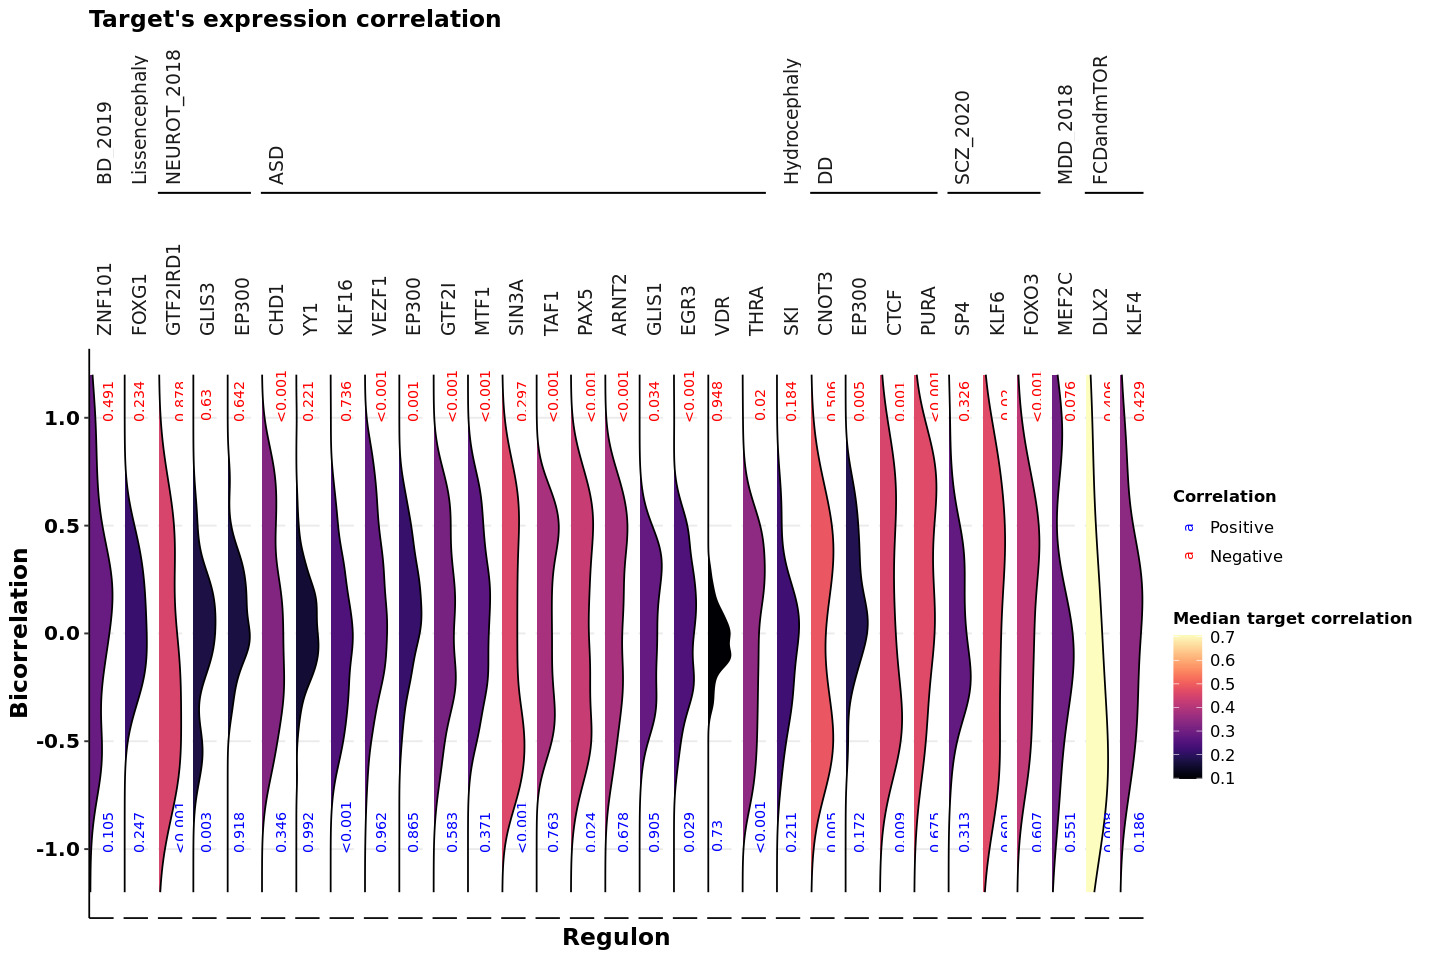

In [138]:
bicor.pval.plot2

In [139]:
bicor.pn.plot2 <- bicor.plot4 + geom_text(
    data = lbl.df,
    aes(y=bicor*1.2,
        label=n.sign.lbl, 
        color=side, 
        x=0.3
    ), hjust = 0.5, vjust = 1, size=3, angle=90) + 
    scale_color_manual('Correlation', values=c('pos'='red', 'neg'='blue'), labels=c('Positive', 'Negative')) +
    scale_y_continuous(limits=c(-1.2,1.2))

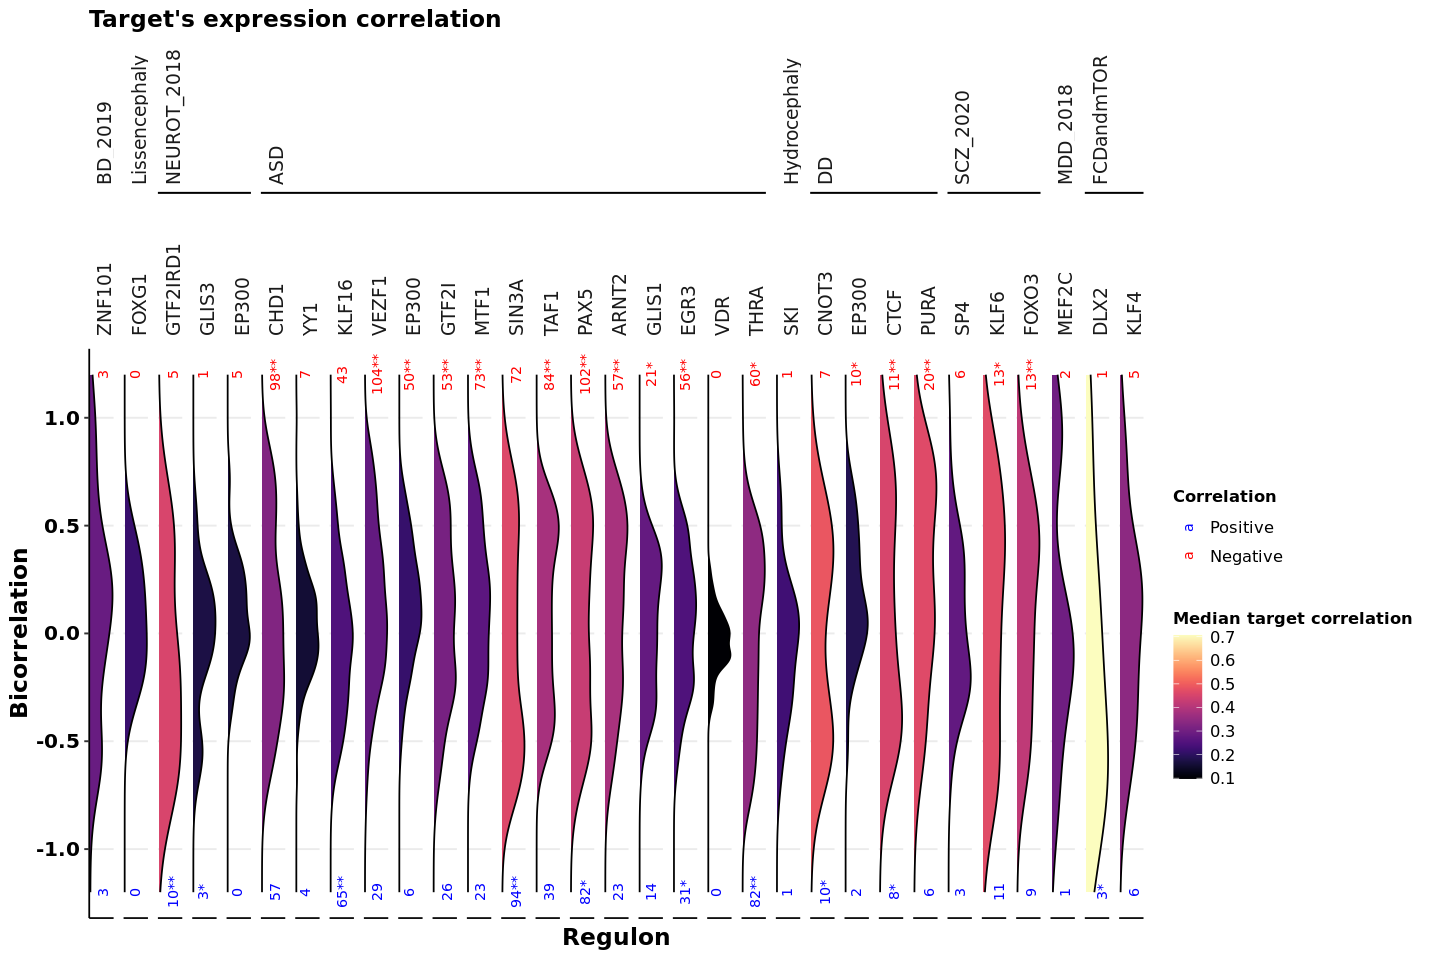

In [140]:
bicor.pn.plot2

In [88]:
bicor.star.plot <- bicor.plot + geom_text(
    data = lbl.df,
    aes(
        label=sign.star, 
        color=side, 
        y=y), hjust = 0.5, vjust = 1, size=4, fontface = "bold") + 
    scale_color_manual('Correlation', values=c('pos'='red', 'neg'='blue'), labels=c('Positive', 'Negative')) 
    # scale_x_continuous(limits=c(-1.2,1.2))

In [89]:
bicor.star.plot2 <- bicor.plot4 + geom_text(
    data = lbl.df,
    aes(y=bicor*1.05,
        label=sign.star, 
        color=side, 
        x=0.5), hjust = 0.5, vjust = 0.5, size=5, angle=0) + 
    scale_color_manual('Correlation', values=c('pos'='red', 'neg'='blue'), labels=c('Positive', 'Negative'))

In [90]:
figsize(12,7)

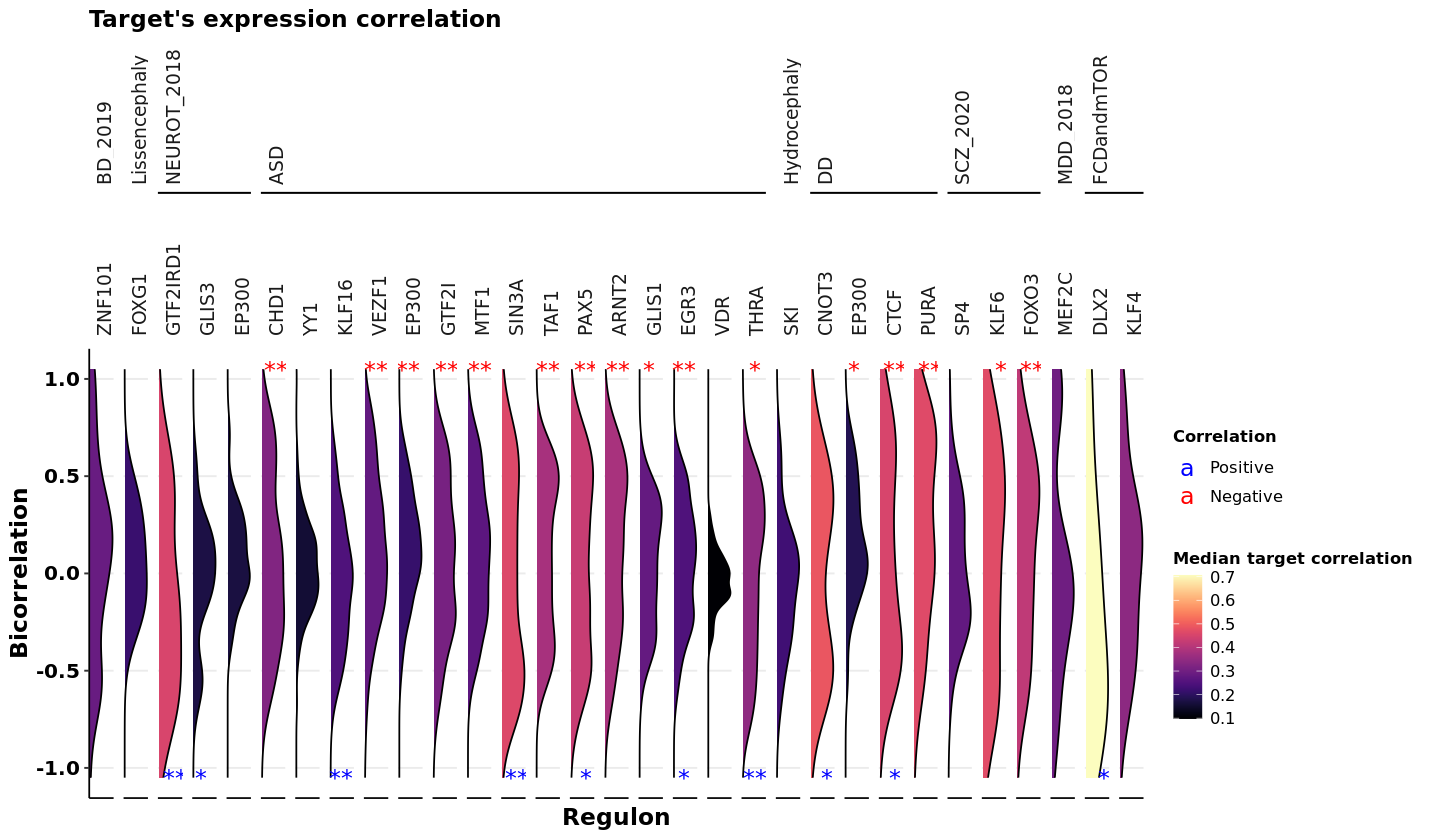

In [91]:
bicor.star.plot2

### Export

In [92]:
pdf('Fig4.C.BicorDistribution.pdf', 
    useDingbats = F, width=8, height=10)
plot(bicor.star.plot)
dev.off()

png 
  2

In [93]:
pdf('Fig4.C.BicorDistribution.pval.pdf', 
    useDingbats = F, width=8, height=10)
plot(bicor.pval.plot)
dev.off()

png 
  2

In [94]:
pdf('Fig4.C.BicorDistribution2.pdf', 
    useDingbats = F, width=9, height=6)
plot(bicor.star.plot2)
dev.off()

png 
  2

In [95]:
pdf('Fig4.C.BicorDistribution2.pval.pdf', 
    useDingbats = F, width=10, height=8)
plot(bicor.pval.plot2)
dev.off()

png 
  2

# Variation 1: add barplots of significantly correlated targets

In [141]:
pos.bicor <- unique(
    bicor.df %>%
        group_by(geneSet, Core) %>% 
        summarise(
            Target=ifelse(bicor > 0 & bicor.p <= 0.05, Target, NA),
            Core, geneSet, CoreFct, DisFct) %>% 
    
        group_by(geneSet, Core, CoreFct, DisFct) %>% 
        summarise(
            Target = if (all(is.na(Target))) NA else Target[!is.na(Target)]) %>%
        mutate(
            TargetPeakFct=GeneAnnotation[Target, 'PeakSampleFct'],
            TargetPeak=GeneAnnotation[Target, 'PeakSample'])
            )

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'geneSet', 'Core'. You can override using
the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'geneSet', 'Core', 'CoreFct', 'DisFct'. You
can override using the `.groups` argument.


In [142]:
neg.bicor <- unique(
    bicor.df %>%
        group_by(geneSet, Core) %>% 
        summarise(
            Target=ifelse(bicor < 0 & bicor.p <= 0.05, Target, NA),
            Core, geneSet, CoreFct, DisFct) %>% 
    
        group_by(geneSet, Core, CoreFct, DisFct) %>% 
        summarise(
            Target = if (all(is.na(Target))) NA else Target[!is.na(Target)]) %>%
        mutate(
            TargetPeakFct=GeneAnnotation[Target, 'PeakSampleFct'],
            TargetPeak=GeneAnnotation[Target, 'PeakSample'])
            )

Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'geneSet', 'Core'. You can override using
the `.groups` argument.
Warning message:
“Returning more (or less) than 1 row per `summarise()` group was deprecated in
dplyr 1.1.0.
ℹ Please use `reframe()` instead.
ℹ When switching from `summarise()` to `reframe()`, remember that `reframe()`
  always returns an ungrouped data frame and adjust accordingly.”
`summarise()` has grouped output by 'geneSet', 'Core', 'CoreFct', 'DisFct'. You
can override using the `.groups` argument.


In [143]:
barplot.pos <- ggplot(pos.bicor) + 
    geom_bar(aes(x=0,fill=TargetPeakFct), position = 'fill') + 
    # geom_histogram(aes(fill=CoreColor), color=NA, bins = 10) + 
    # geom_violin(aes(fill=CoreColor, x=CoreFct)) + 
    facet_nested(cols=vars(DisFct, CoreFct), scales='free', space='fixed', nest_line = T) +# , switch='both')  +
    scale_fill_manual('Peak sample', values=meta.colors$PeakSample, na.value = NA)

barplot.pos <- barplot.pos + 
    xlab('') +
    ylab('Pos corr targets') +
    theme_pubr(legend = 'none') +
    labs_pubr() +
    theme(
        text = element_text(family='ArialMT'),
        panel.grid.major.x = element_blank(), 
        panel.grid.minor.x = element_blank(),
        strip.background = element_blank(),
        strip.placement = 'outside',
        strip.text.x.top = element_text(angle = 90, hjust=0, vjust=1),
        panel.background = element_rect(fill='white'),
        panel.grid.major = element_line(),
        # axis.text.x = element_text(size=9, angle = 90, hjust=1, vjust=0.5),
        # axis.text.x.top = element_text(size=9, angle = 90, hjust=0, vjust=0.5),
        # axis.title.y = element_text(angle = 90, hjust=0, vjust=1),
        axis.ticks.x = element_blank(),
    
        axis.text.x = element_blank()
    )  

In [144]:
barplot.neg <- ggplot(neg.bicor) + 
    geom_bar(aes(x=0,fill=TargetPeakFct), position = 'fill') + 
    # geom_histogram(aes(fill=CoreColor), color=NA, bins = 10) + 
    # geom_violin(aes(fill=CoreColor, x=CoreFct)) + 
    facet_nested(cols=vars(DisFct, CoreFct), scales='free', space='fixed', nest_line = T, switch='both') +
    scale_fill_manual('Peak sample', values=meta.colors$PeakSample, na.value = NA)

barplot.neg <- barplot.neg + 
    xlab('') +
    ylab('Neg corr targets') +
    theme_pubr(legend = 'none') +
    labs_pubr() +
    # scale_y_reverse() + 
    theme(
        text = element_text(family='ArialMT'),
        panel.grid.major.x = element_blank(), 
        panel.grid.minor.x = element_blank(),
        strip.background = element_blank(),
        strip.placement = 'outside',
        strip.text.x = element_text(angle = 90, hjust=1, vjust=1),
        panel.background = element_rect(fill='white'),
        panel.grid.major = element_line(),
        # axis.text.x = element_text(size=9, angle = 90, hjust=1, vjust=0.5),
        # axis.text.x.top = element_text(size=9, angle = 90, hjust=0, vjust=0.5),
        # axis.title.y = element_text(angle = 90, hjust=0, vjust=1),
        axis.ticks.x = element_blank(),
    
        axis.text.x = element_blank()
    )  

png 
  2

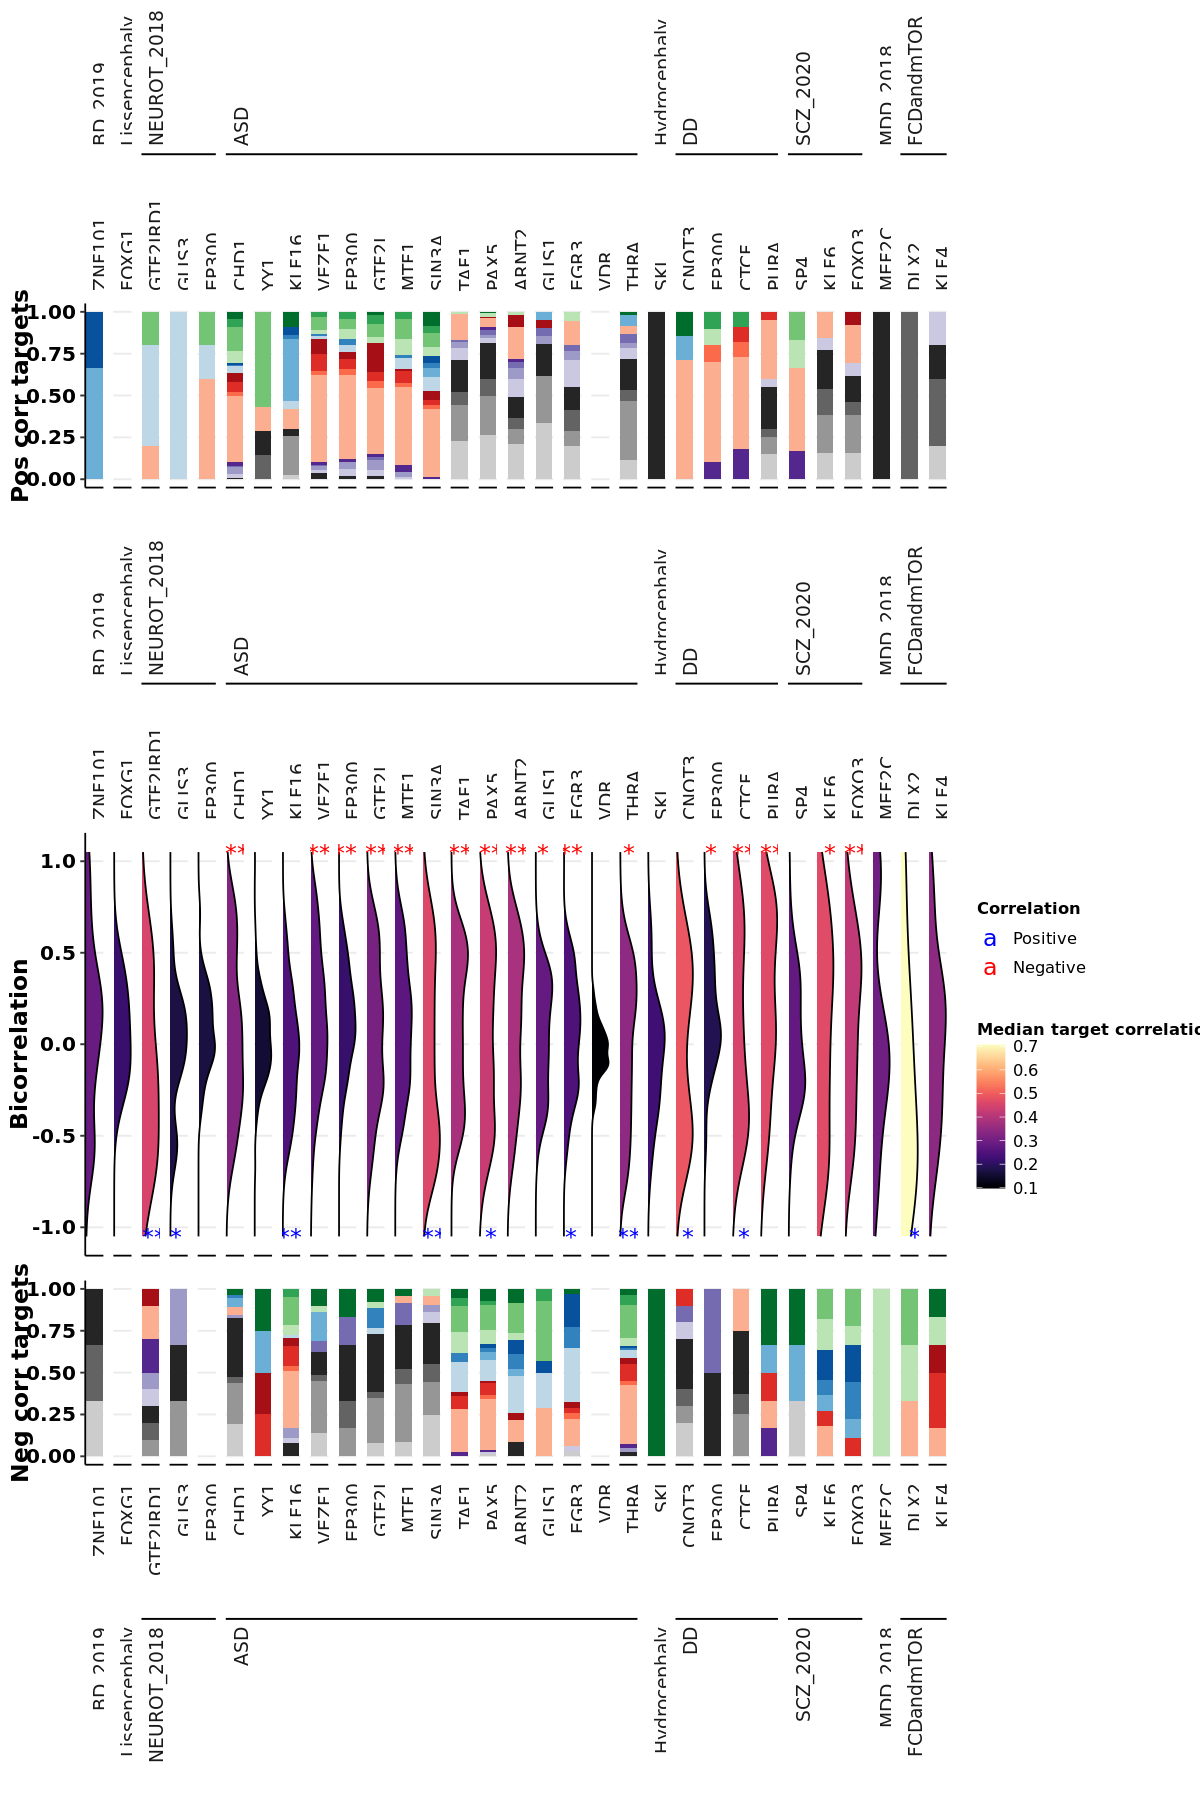

In [145]:
bicor.barplots <- cowplot::plot_grid(
    barplot.pos, 
    bicor.star.plot2 + ggtitle(NULL) + xlab(NULL),
    barplot.neg, 
    
    ncol=1, rel_heights=c(5, 7, 5), align='v', axis = 'rl')

figsize(10,15)
bicor.barplots

pdf('Fig4.C.BicorDistribution2.Barplots.pdf', 
    useDingbats = F, width=9, height=12)
plot(bicor.barplots)
dev.off()

png 
  2

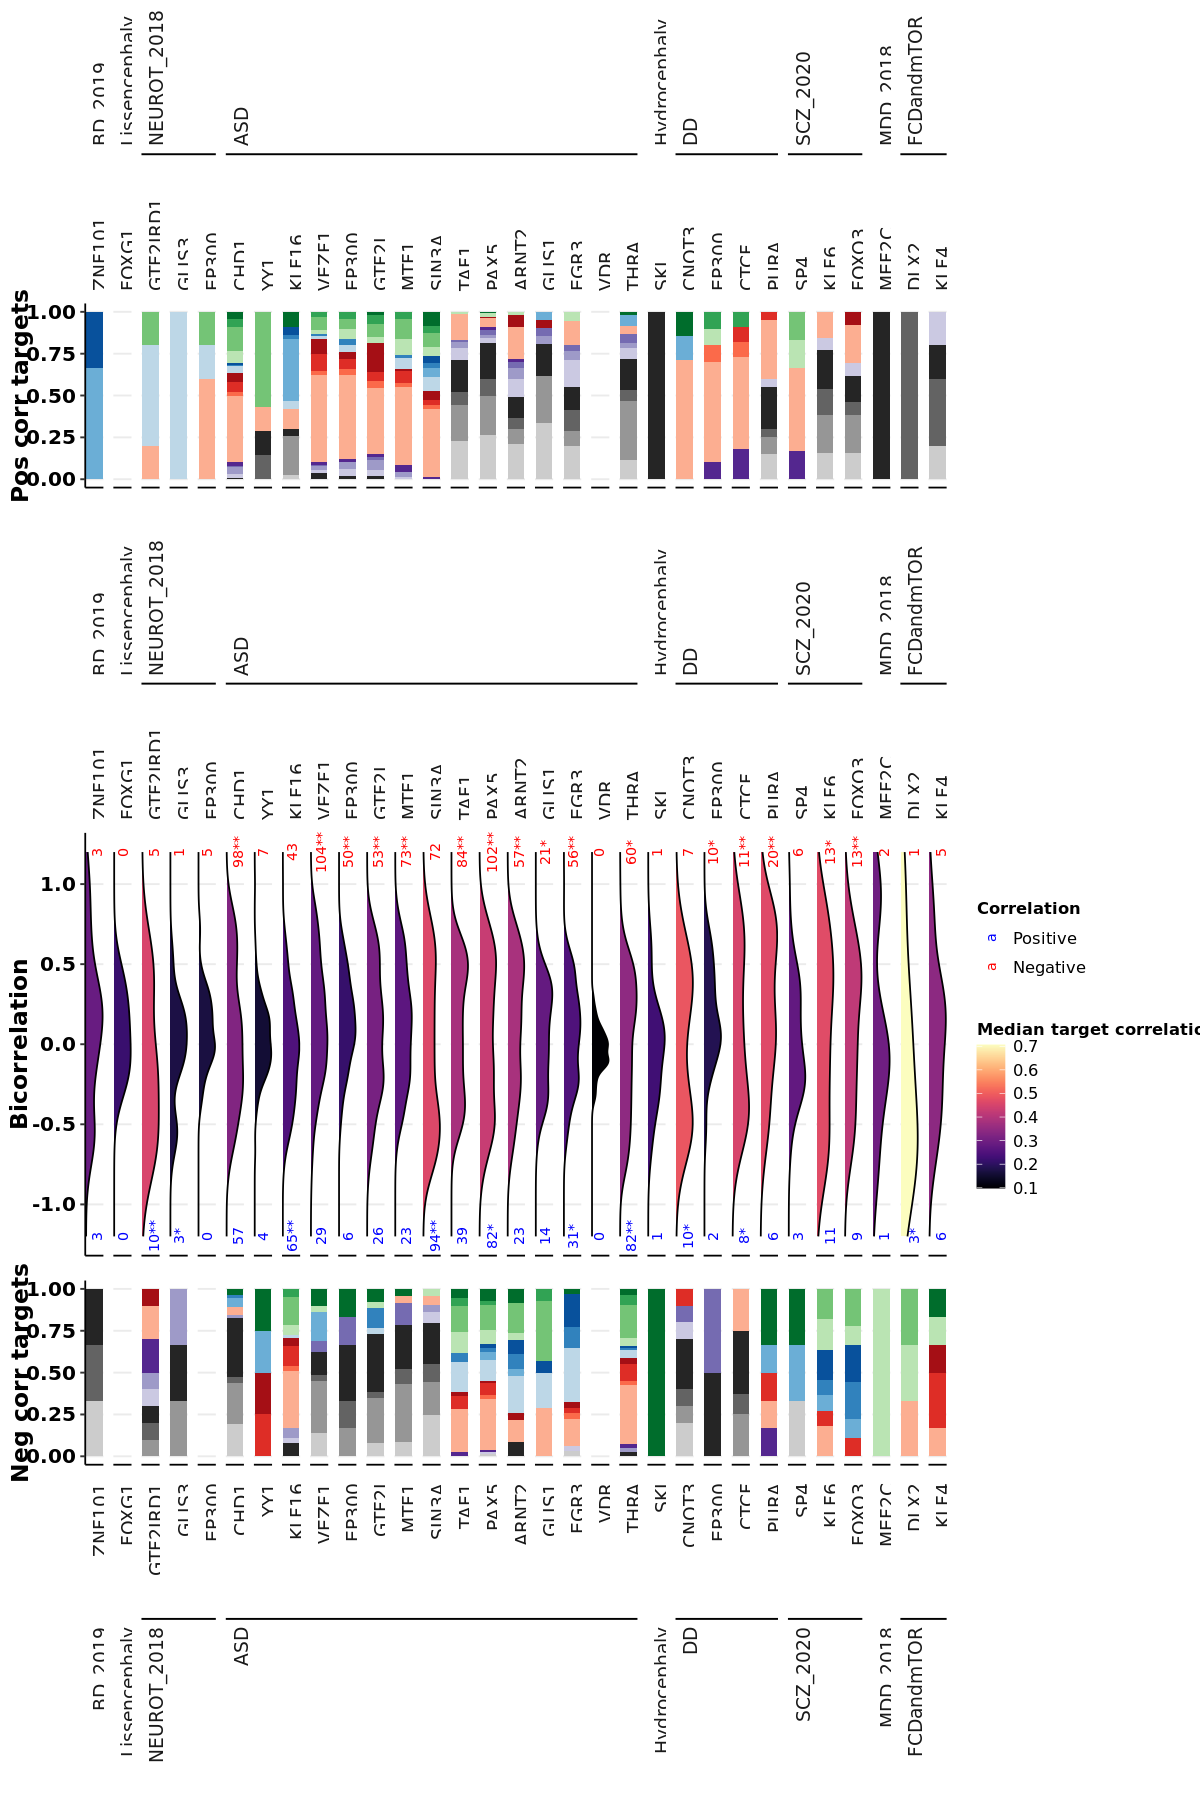

In [146]:
bicor.barplots2 <- cowplot::plot_grid(
    barplot.pos, 
    bicor.pn.plot2 + ggtitle(NULL) + xlab(NULL),
    barplot.neg, 
    
    ncol=1, rel_heights=c(5, 7, 5), align='v', axis = 'rl')

figsize(10,15)
bicor.barplots2

pdf('Fig4.C.BicorDistribution2.Barplots2.pdf', 
    useDingbats = F, width=12, height=12)
plot(bicor.barplots2)
dev.off()

# Variation 2: add points of significantly correlated targets

In [103]:
point.bicor <- subset(bicor.df, bicor.p <=0.05) %>%
        mutate(
            TargetPeakFct=GeneAnnotation[Target, 'PeakSampleFct'],
            TargetPeak=GeneAnnotation[Target, 'PeakSample'])

In [104]:
point.bicor

,bicor,bicor.p,bicor.Z,bicor.t,bicor.nObs,Target,Core,geneSet,CoreColor,CoreFct,DisFct,TargetPeakFct,TargetPeak
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<chr>,<chr>,<fct>,<fct>,<fct>,<fct>,<chr>
ASD ARNT2.6,0.6974254,6.305266e-04,3.658302,4.128786,20,ANKS1B,ARNT2,ASD,P6.FGF10,ARNT2,ASD,P8.FGF20,P8.FGF20
ASD ARNT2.8,-0.5117929,2.106890e-02,-2.397754,2.527448,20,ARHGAP5,ARNT2,ASD,P6.FGF10,ARNT2,ASD,P2.FGF1,P2.FGF1
ASD ARNT2.12,0.7744046,6.126509e-05,4.375174,5.192933,20,AUTS2,ARNT2,ASD,P6.FGF10,ARNT2,ASD,P4.FGF0.1,P4.FGF0.1
ASD ARNT2.13,0.4653955,3.865382e-02,2.139040,2.230821,20,BAZ2B,ARNT2,ASD,P6.FGF10,ARNT2,ASD,P4.FGF20,P4.FGF20
ASD ARNT2.14,0.6270130,3.088299e-03,3.124614,3.414840,20,BCL11A,ARNT2,ASD,P6.FGF10,ARNT2,ASD,P6.FGF0.1,P6.FGF0.1
ASD ARNT2.17,0.6714326,1.188938e-03,3.450740,3.843987,20,CACNA1D,ARNT2,ASD,P6.FGF10,ARNT2,ASD,P8.FGF1,P8.FGF1
ASD ARNT2.20,-0.5895801,6.221706e-03,-2.872362,3.096875,20,CADM1,ARNT2,ASD,P6.FGF10,ARNT2,ASD,P3.FGF20,P3.FGF20
ASD ARNT2.21,0.6388618,2.428415e-03,3.208490,3.523184,20,CADM2,ARNT2,ASD,P6.FGF10,ARNT2,ASD,P4.FGF20,P4.FGF20
ASD ARNT2.23,-0.6874478,8.103340e-04,-3.576972,4.016054,20,CADPS2,ARNT2,ASD,P6.FGF10,ARNT2,ASD,P3.FGF0.1,P3.FGF0.1


In [105]:
pos.jitter.hori <- position_jitter(width=0.2, height=0)

In [106]:
bicor.point.plot3 <- bicor.plot3 + geom_point(
    data = point.bicor,
    aes(y=bicor,
        size=abs(bicor),
        fill=TargetPeakFct, 
        x=0.5), stroke=0.2, alpha=0.7, shape=21, position=pos.jitter.hori) +
    scale_fill_manual('Target peak sample', values=meta.colors$PeakSample) + 
    guides(fill=guide_none(), color=guide_none()) +
    scale_size_binned('bicor', range=c(1,4), n.breaks = 4) + 
    theme(legend.position = 'right')

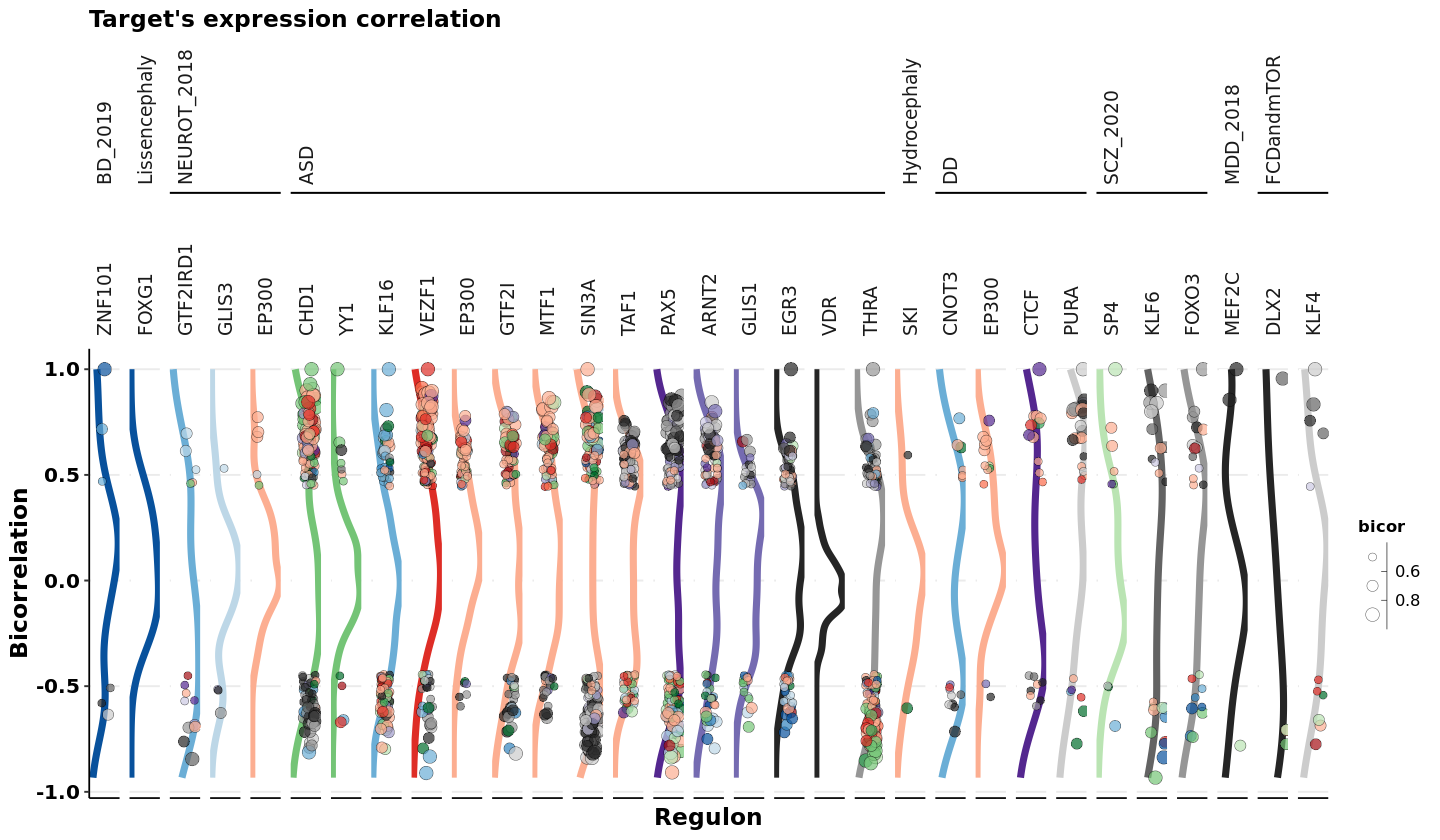

In [107]:
figsize(12,7)
bicor.point.plot3

In [108]:
pdf('Fig4.C.BicorDistribution2.DensityDots.pdf', 
    useDingbats = F, width=12, height=9)
plot(bicor.point.plot3)
dev.off()

png 
  2

# Variation 3: stacked density per pass

In [109]:
bicor.pass <- bicor.df %>%
    mutate(
        TargetPeakFct=GeneAnnotation[Target, 'PeakSampleFct'],
        TargetPeak=GeneAnnotation[Target, 'PeakSample'])

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”

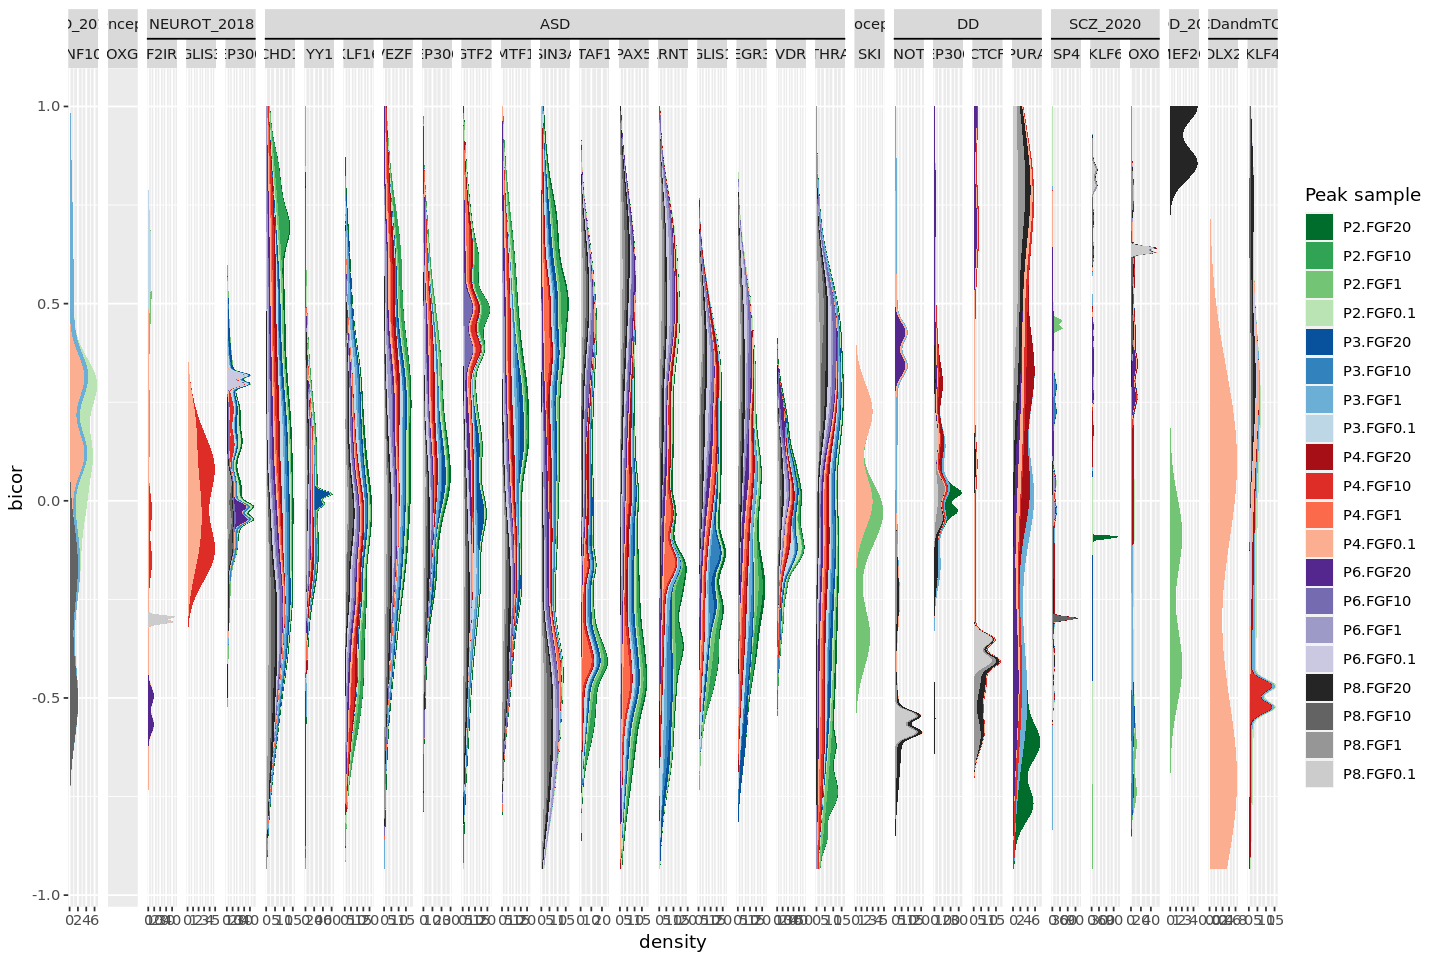

In [110]:
figsize(12,8)
bicor.plot4 <- ggplot(bicor.pass, aes(y=bicor)) + 
    geom_density(aes(fill=TargetPeakFct), color=NA, position='stack') + 
    # geom_histogram(aes(fill=CoreColor), color=NA, bins = 10) + 
    # geom_violin(aes(fill=CoreColor, x=CoreFct)) + 
    facet_nested(cols=vars(DisFct, CoreFct), scales='free', space='fixed', nest_line = T) +# , switch='both')  +
    # scale_color_manual('Peak sample', values=meta.colors$PeakSample) +
    scale_fill_manual('Peak sample', values=meta.colors$PeakSample)
bicor.plot4

Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”
Warning message:
“Groups with fewer than two data points have been dropped.”

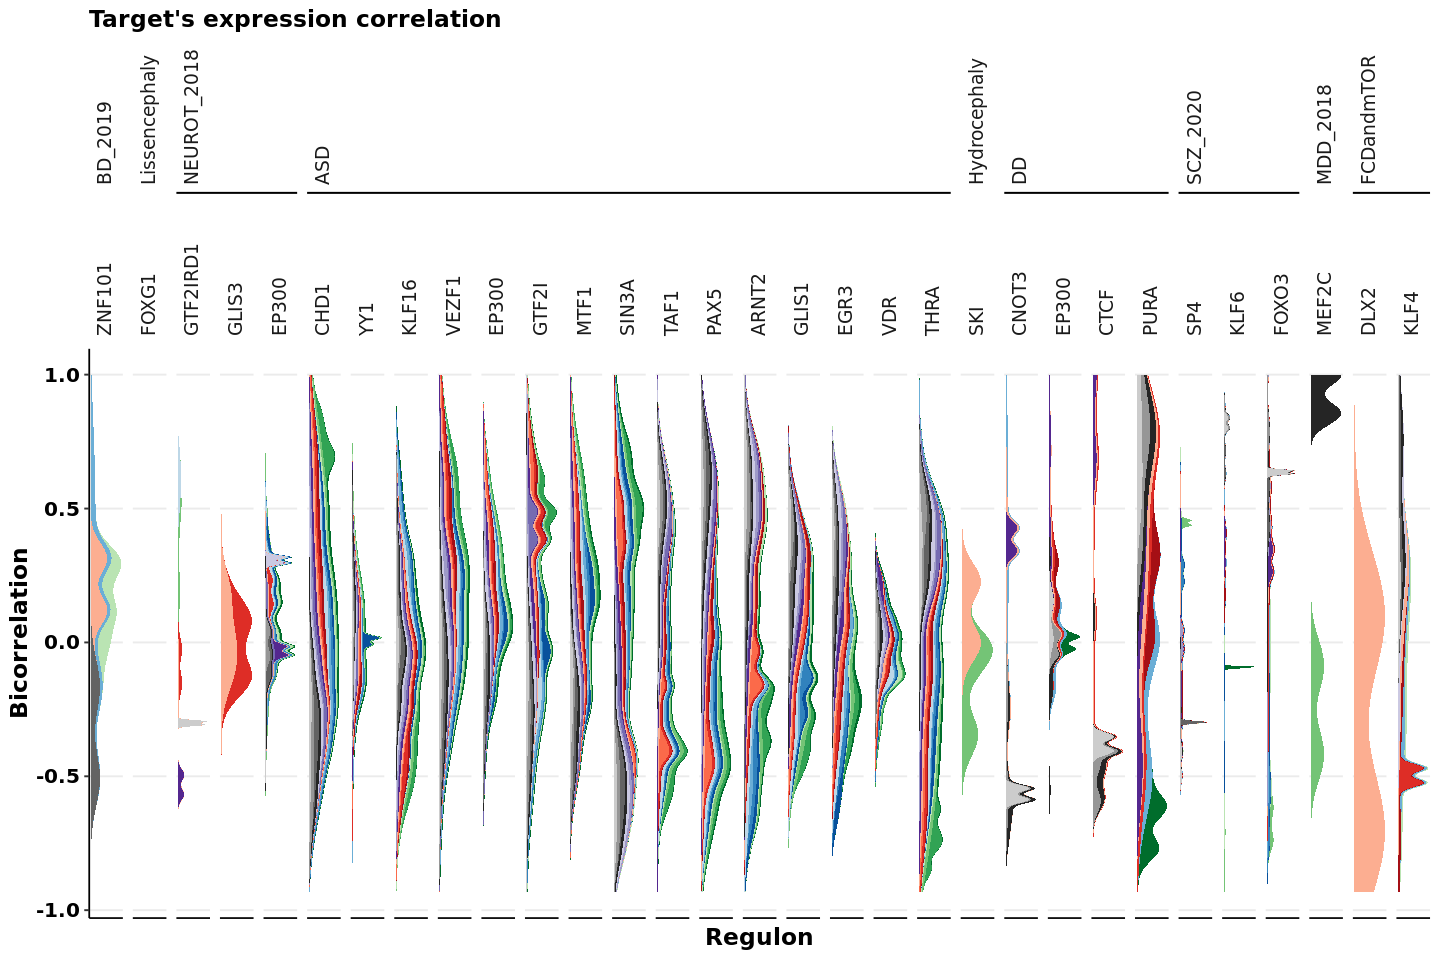

In [111]:
bicor.plot4 <- bicor.plot4 + 
    xlab('Regulon') +
    ylab('Bicorrelation') +
    ggtitle("Target's expression correlation") +
    theme_pubr(legend = 'none') +
    labs_pubr() +
    guides(color=guide_legend(ncol=2,byrow=F, title.position = 'top')) +
    theme(
        text = element_text(family='ArialMT'),
        panel.grid.major.x = element_blank(), 
        panel.grid.minor.x = element_blank(),
        strip.background = element_blank(),
        strip.placement = 'outside',
        strip.text.x.top = element_text(angle = 90, hjust=0, vjust=1),
        panel.background = element_rect(fill='white'),
        panel.grid.major = element_line(),
        # axis.text.x = element_text(size=9, angle = 90, hjust=1, vjust=0.5),
        # axis.text.x.top = element_text(size=9, angle = 90, hjust=0, vjust=0.5),
        # axis.title.y = element_text(angle = 90, hjust=0, vjust=1),
        axis.ticks.x = element_blank(),
    
        axis.text.x = element_blank()
    )  

bicor.plot4